In [1]:
import numpy             as np
import tables            as tb
import matplotlib.pyplot as plt

from invisible_cities.core  import fit_functions as fitf
from invisible_cities.icaro import hst_functions as hstf

In [2]:
%matplotlib inline

plt.rcParams["figure.figsize"] = 20, 15
plt.rcParams[  "font.size"   ] = 15

# RWF validation

In [3]:
solid_filename  = "/Users/Gonzalo/github/NEXTdata/test_cityflows/rwf_solid/dst_NEXT_v1_00_05_Kr_ACTIVE_0_0_7bar_RWF_10000.root.h5"
liquid_filename = "/Users/Gonzalo/github/NEXTdata/test_cityflows/rwf_liquid/dst_NEXT_v1_00_05_Kr_ACTIVE_0_0_7bar_RWF_10000.root.h5"

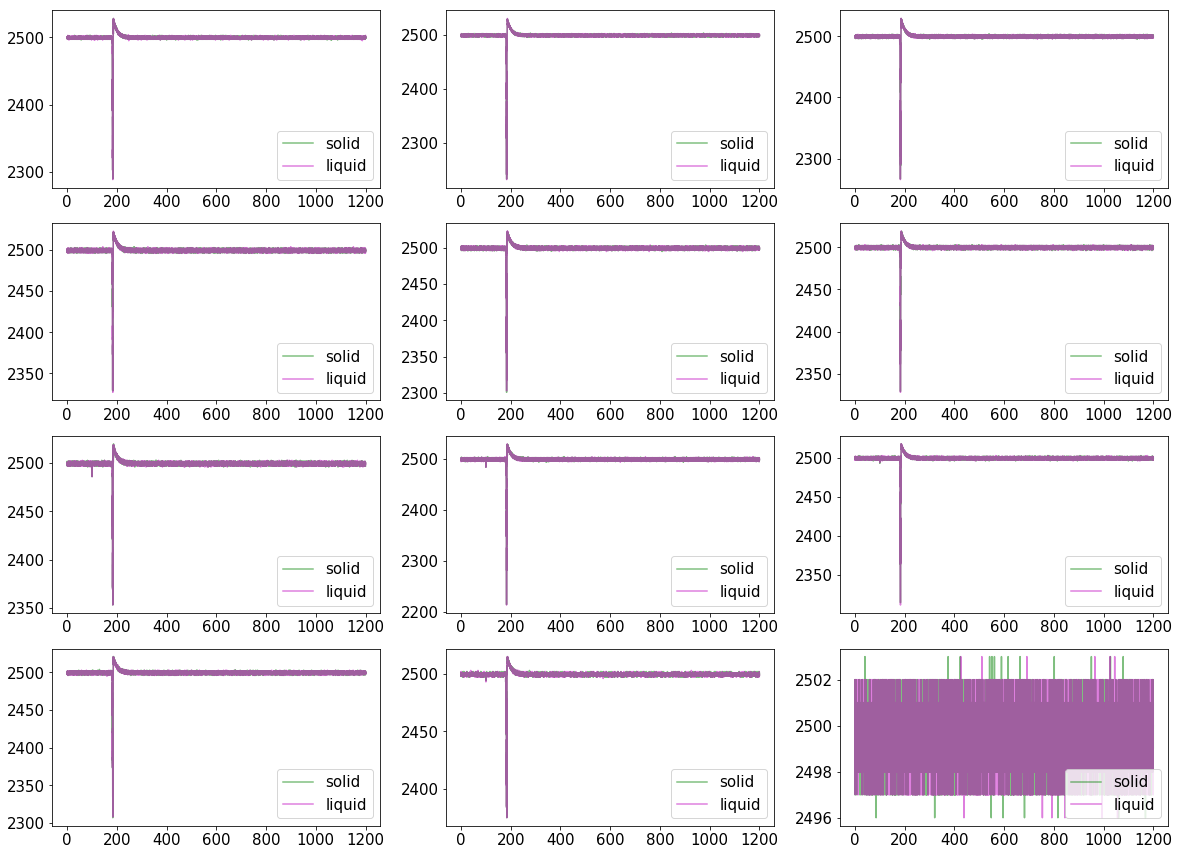

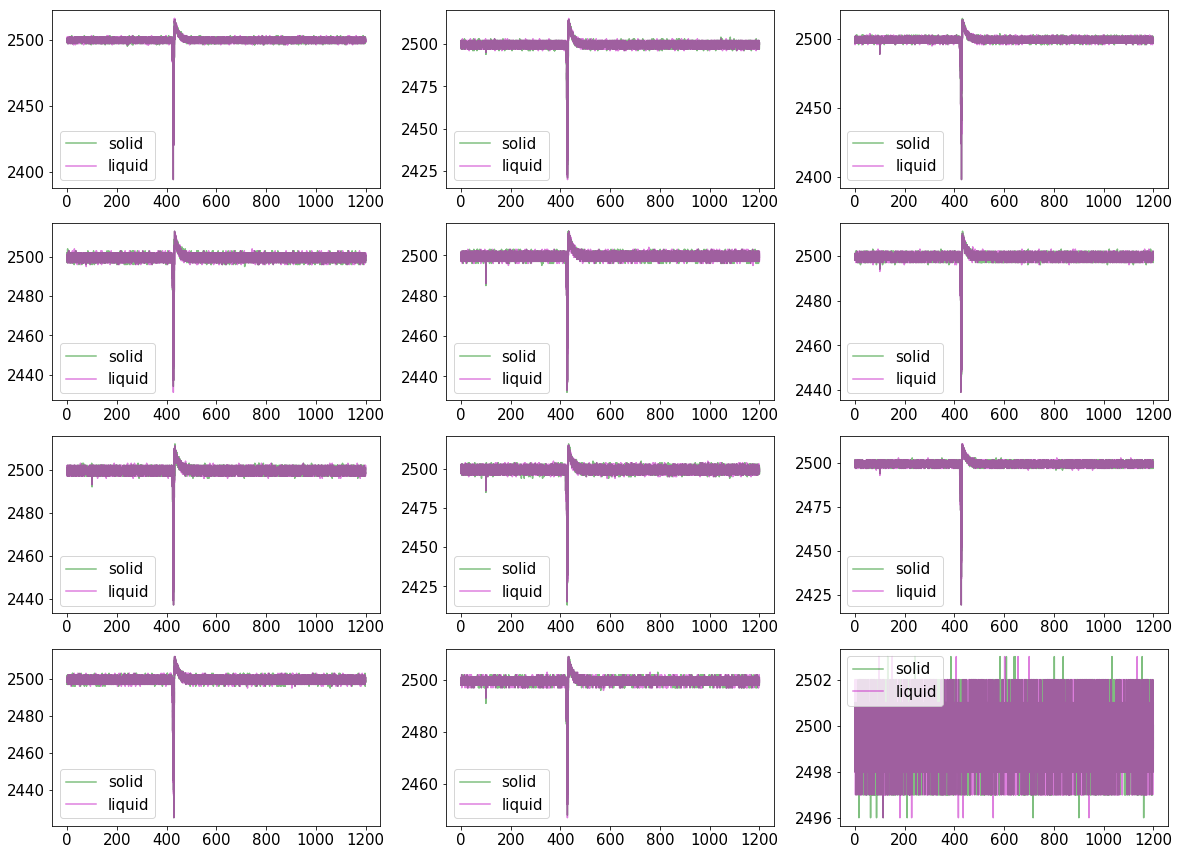

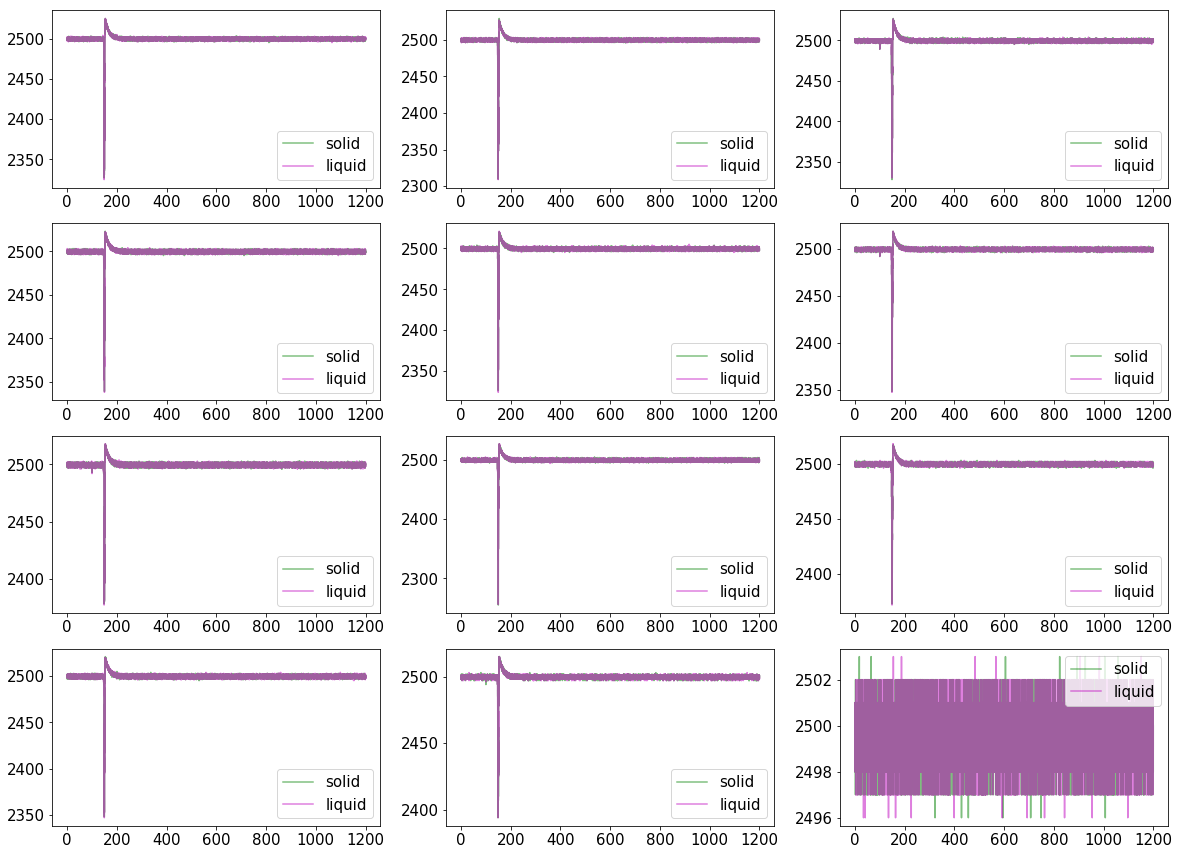

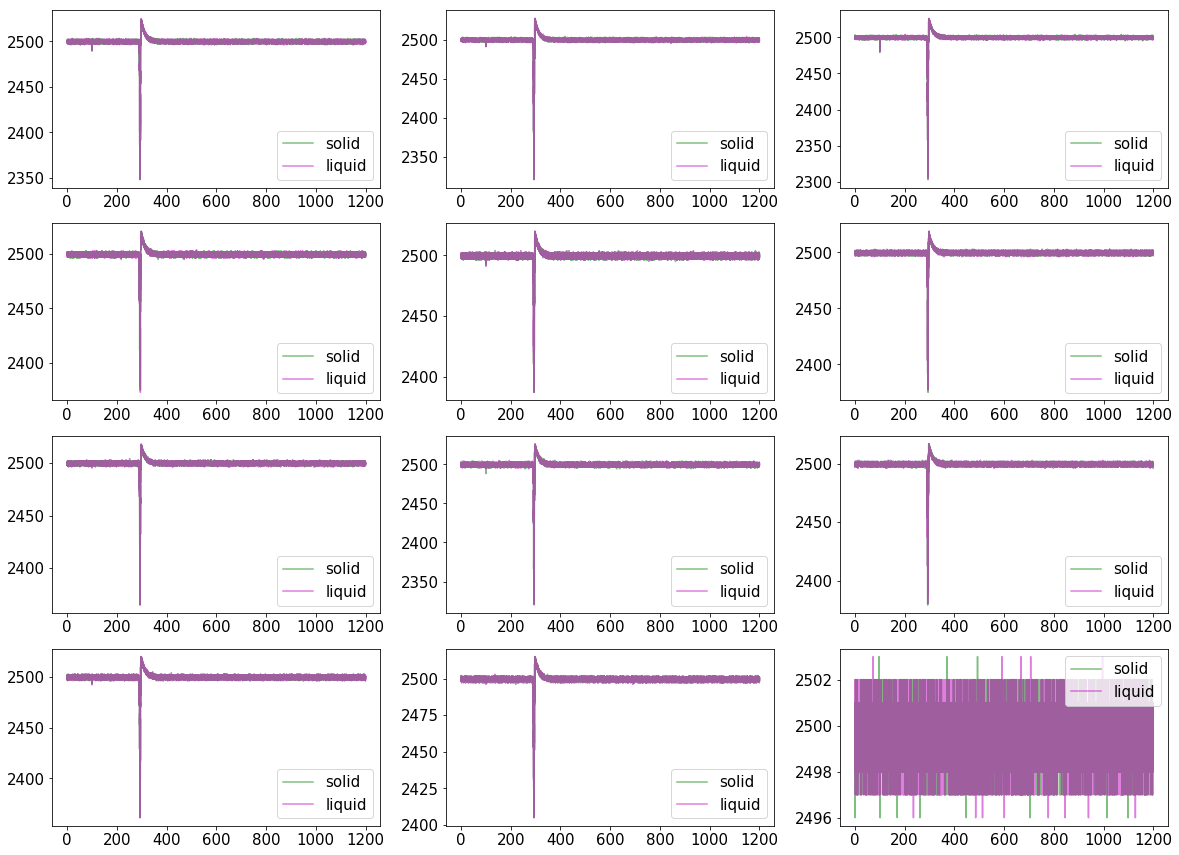

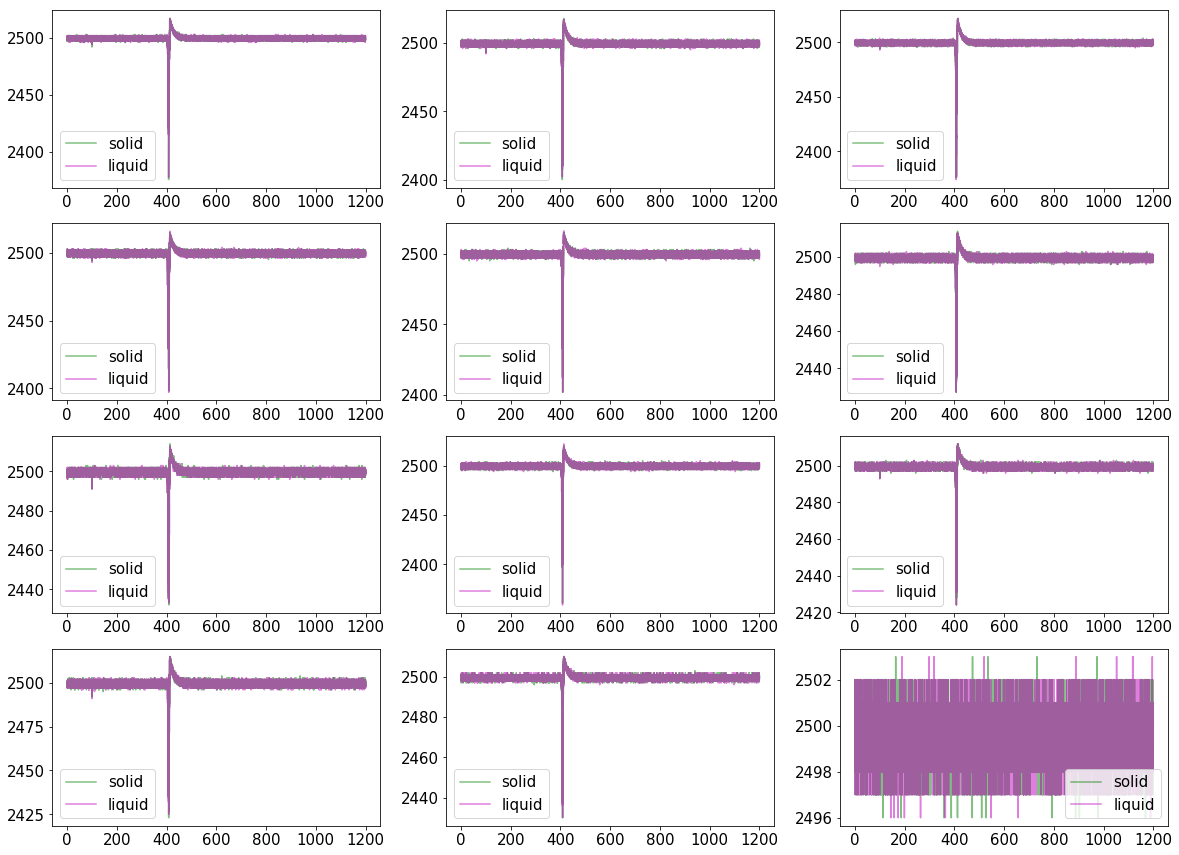

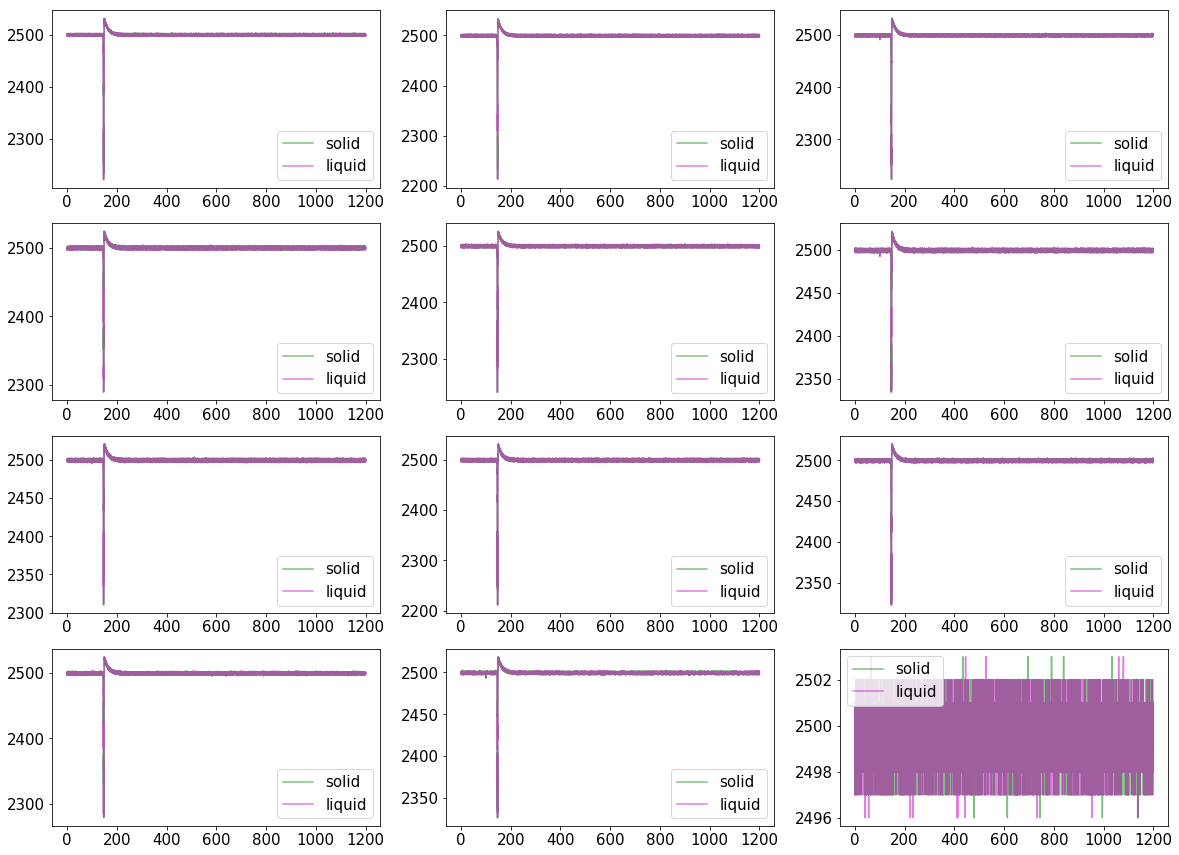

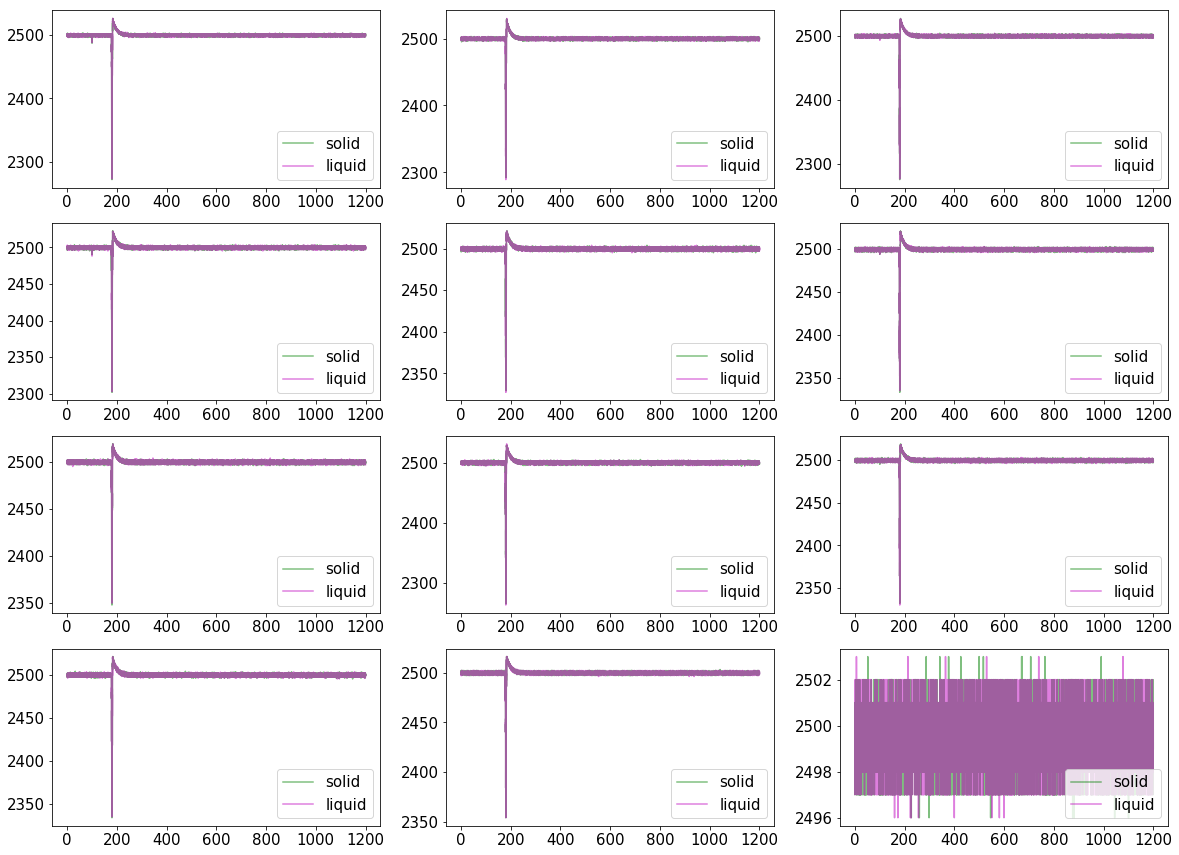

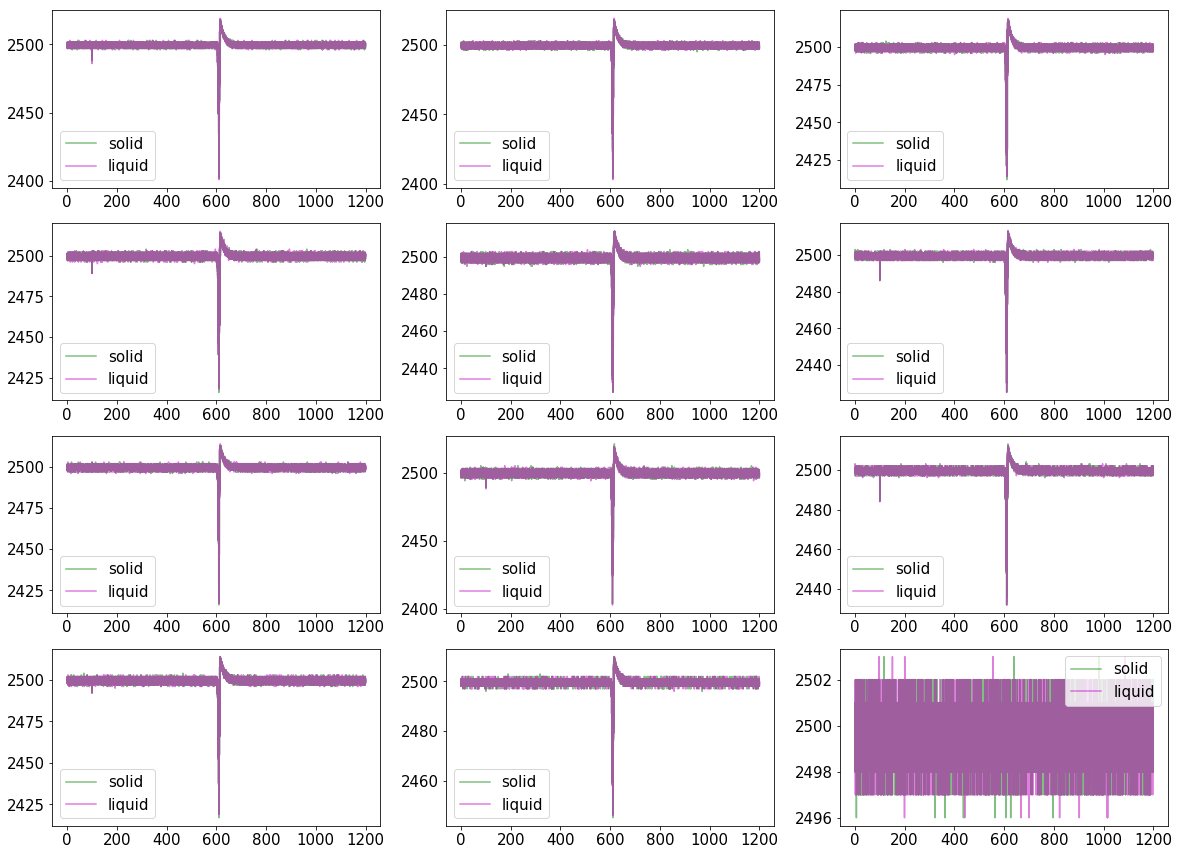

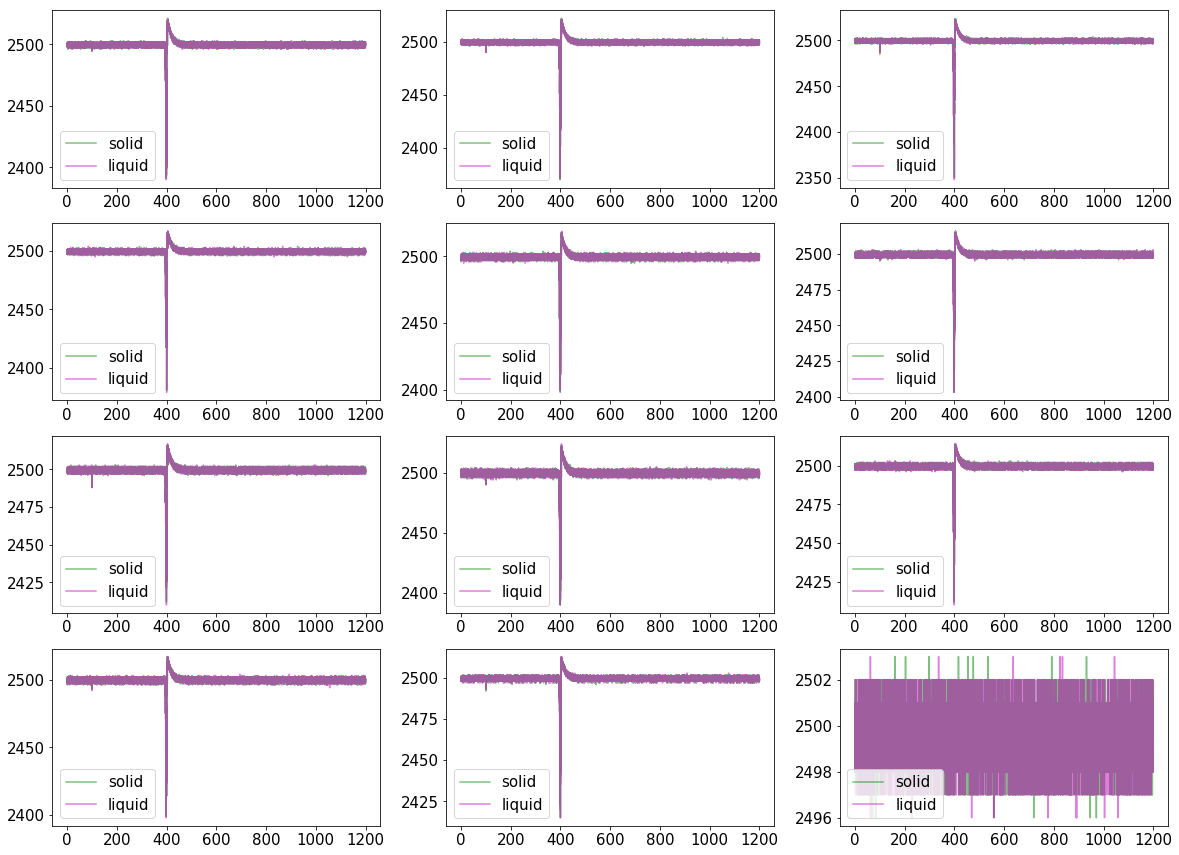

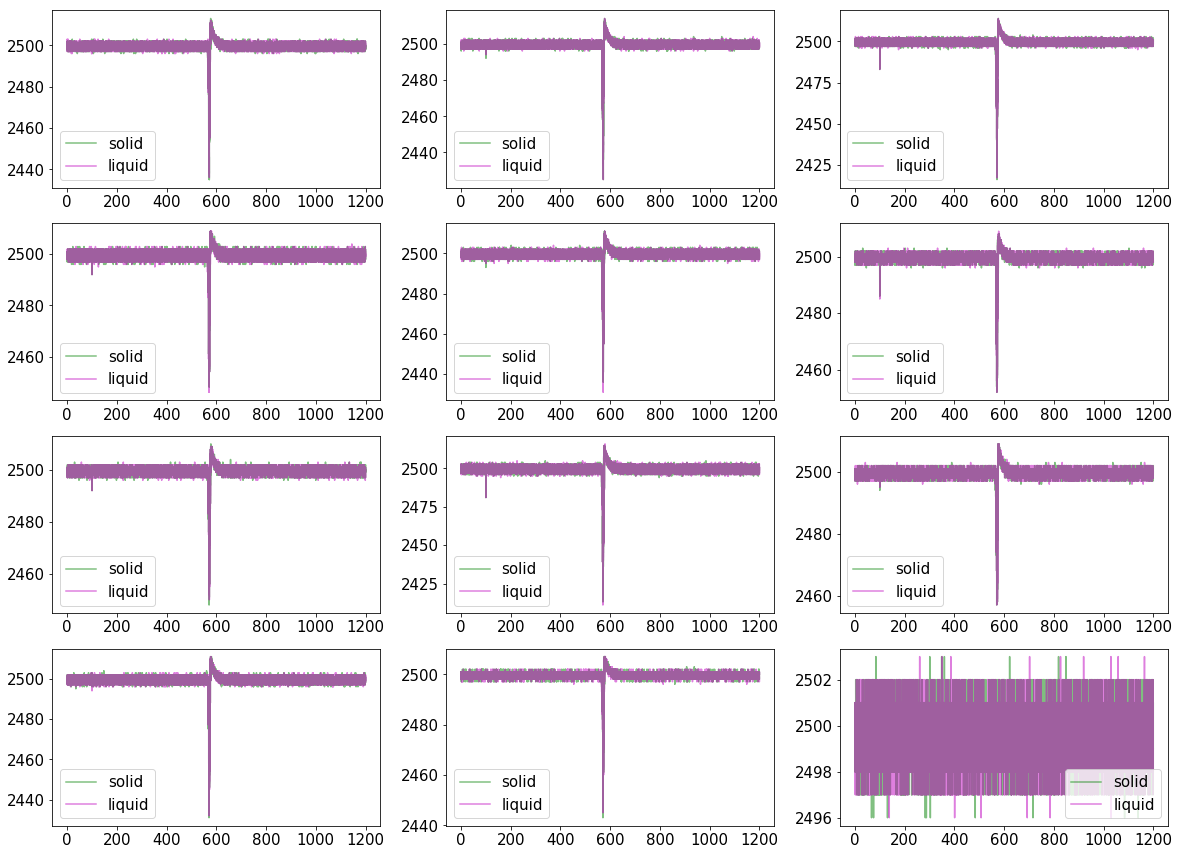

In [4]:
with tb.open_file(solid_filename) as solid, tb.open_file(liquid_filename) as liquid:
    solid_wfs  =  solid.root.RD.pmtrwf
    liquid_wfs = liquid.root.RD.pmtrwf
    
    nevt, npmt, ntime = solid_wfs.shape
    time = np.arange(ntime) * 25 / 1000
    
    for i in range(10):
        plt.figure()
        for j in range(npmt):
            plt.subplot(4, 3, j+1)
            plt.plot(time,  solid_wfs[i, j], c="g", label= "solid", alpha=0.5)
            plt.plot(time, liquid_wfs[i, j], c="m", label="liquid", alpha=0.5)
            plt.legend()
        plt.show()
        #input("Press Enter to continue")

#### Statistical comparison

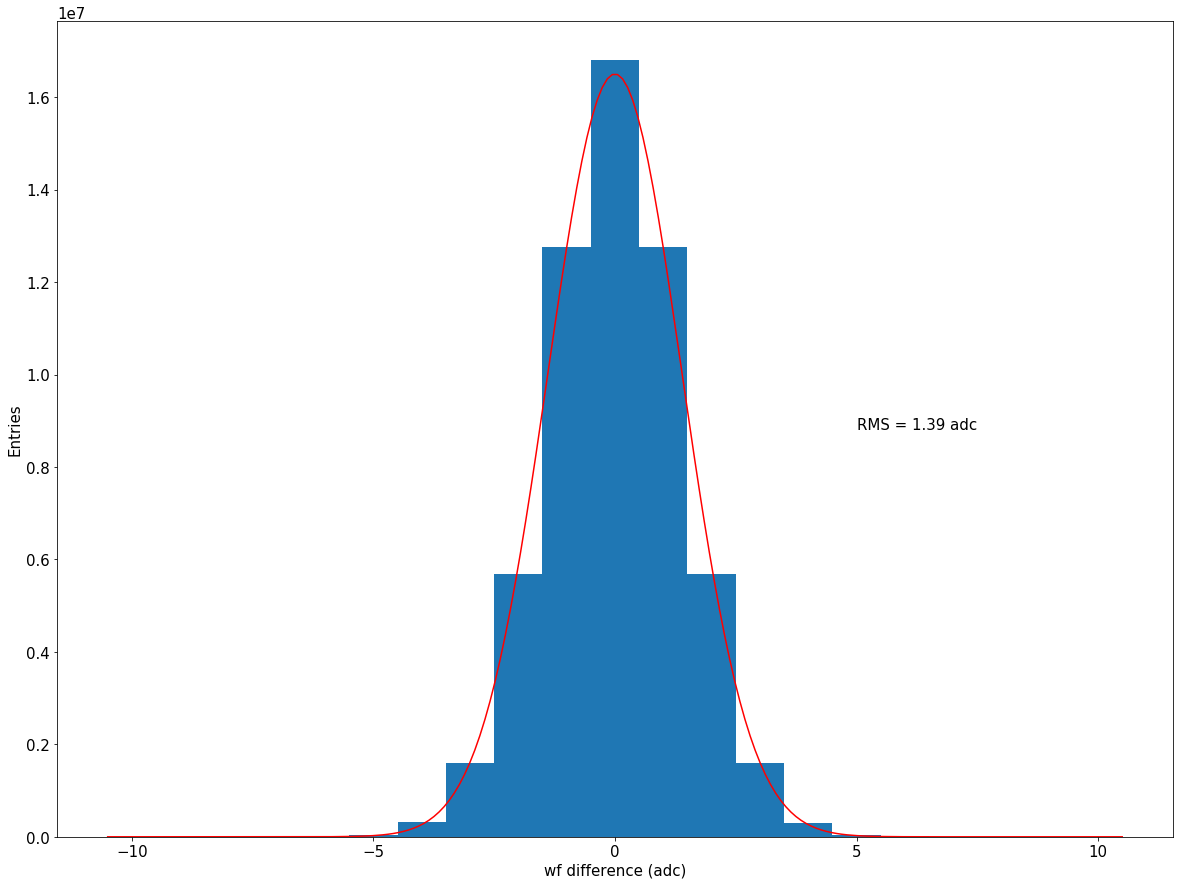

In [7]:
with tb.open_file(solid_filename) as solid, tb.open_file(liquid_filename) as liquid:
    solid_wfs  =  solid.root.RD.pmtrwf
    liquid_wfs = liquid.root.RD.pmtrwf
    diff       = solid_wfs[:] - liquid_wfs[:]

y, x, _ = plt.hist(diff.flatten(), np.linspace(-10.5, 10.5, 22))
x       = hstf.shift_to_bin_centers(x)
f       = fitf.fit(fitf.gauss, x, y, (0, 1, 1), sigma=np.clip(y**0.5, 3, np.inf))
x       = np.linspace(-10.5, 10.5, 200)

plt.plot(x, f.fn(x), "-r")
plt.text(5, plt.ylim()[1]/2, f"RMS = {f.values[2]:.2f} adc")
plt.xlabel("wf difference (adc)")
plt.ylabel("Entries")

# PMAP validation

In [8]:
solid_filename  = "/Users/Gonzalo/github/NEXTdata/test_cityflows/pmap_solid/dst_NEXT_v1_00_05_Kr_ACTIVE_0_0_7bar_PMP_10000.root.h5"
liquid_filename = "/Users/Gonzalo/github/NEXTdata/test_cityflows/pmap_liquid/dst_NEXT_v1_00_05_Kr_ACTIVE_0_0_7bar_PMP_10000.root.h5"

In [17]:
with tb.open_file(solid_filename) as solid, tb.open_file(liquid_filename) as liquid:
    solid_group  =  solid.root.PMAPS
    liquid_group = liquid.root.PMAPS
    for table_name in ("S1", "S1Pmt", "S2", "S2Pmt", "S2Si"):
        solid_table  = getattr( solid_group, table_name)[:]
        liquid_table = getattr(liquid_group, table_name)[:]
        for solid_row, liquid_row in zip(solid_table, liquid_table):
            for solid_value, liquid_value in zip(solid_row, liquid_row):
                assert np.allclose(solid_value, liquid_value)

# KDST validation

In [18]:
solid_filename  = "/Users/Gonzalo/github/NEXTdata/test_cityflows/kdst_solid/dst_NEXT_v1_00_05_Kr_ACTIVE_0_0_7bar_KDST_10000.root.h5"
liquid_filename = "/Users/Gonzalo/github/NEXTdata/test_cityflows/kdst_liquid/dst_NEXT_v1_00_05_Kr_ACTIVE_0_0_7bar_KDST_10000.root.h5"

In [22]:
with tb.open_file(solid_filename) as solid, tb.open_file(liquid_filename) as liquid:
    solid_table  =  solid.root.DST.Events[:]
    liquid_table = liquid.root.DST.Events[:]
    for solid_row, liquid_row in zip(solid_table, liquid_table):
        for solid_value, liquid_value in zip(solid_row, liquid_row):
            assert np.allclose(solid_value, liquid_value)

# HDST validation

In [23]:
solid_filename  = "/Users/Gonzalo/github/NEXTdata/test_cityflows/hdst_solid/dst_NEXT_v1_00_05_Kr_ACTIVE_0_0_7bar_HDST_10000.root.h5"
liquid_filename = "/Users/Gonzalo/github/NEXTdata/test_cityflows/hdst_liquid/dst_NEXT_v1_00_05_Kr_ACTIVE_0_0_7bar_HDST_10000.root.h5"

In [25]:
with tb.open_file(solid_filename) as solid, tb.open_file(liquid_filename) as liquid:
    solid_table  =  solid.root.RECO.Events[:]
    liquid_table = liquid.root.RECO.Events[:]
    for solid_row, liquid_row in zip(solid_table, liquid_table):
        for solid_value, liquid_value in zip(solid_row, liquid_row):
            assert np.allclose(solid_value, liquid_value)

# CAL validation

In [26]:
solid_filename  = "/Users/Gonzalo/github/NEXTdata/test_cityflows/cal_solid/dst_NEXT_v1_00_05_Kr_ACTIVE_0_0_7bar_CAL_10000.root.h5"
liquid_filename = "/Users/Gonzalo/github/NEXTdata/test_cityflows/cal_liquid/dst_NEXT_v1_00_05_Kr_ACTIVE_0_0_7bar_CAL_10000.root.h5"

In [30]:
with tb.open_file(solid_filename) as solid, tb.open_file(liquid_filename) as liquid:
    solid_group  =  solid.root.HIST
    liquid_group = liquid.root.HIST
    for table_name in ("sipm", "sipm_bins", "sipmMAU", "sipmMAU_bins"):
        solid_table  = getattr( solid_group, table_name)[:]
        liquid_table = getattr(liquid_group, table_name)[:]
        for solid_row, liquid_row in zip(solid_table, liquid_table):
            assert np.allclose(solid_row, liquid_row)